# How does the sales trend monthly for each year ?

### Methodology

1. Create Pivot Table year as index , month as column , sum of profit as value
2. Plot final findings

## Import Libraris and Data

In [2]:
# Importing libraris ill use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import humanize


# TODO : Loading the data
data = pd.read_csv('data/superstore.csv' , encoding='latin1')

## Data Cleaning

In [3]:

# TODO : Data Cleaning Phase + managing types
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

col_to_categorize = ['Ship Mode' , 'Sub-Category' , 'Category' , 'Region' , 'Segment' , 'State']
for col in col_to_categorize:
    data[col] = data[col].astype('category')

# Treat duplicate rows
duplicated_sum = data.duplicated().sum()
if duplicated_sum > 0 :
    data.drop_duplicates(inplace=True)

most_occurent_ship_mode = data['Ship Mode'].mode()[0]
most_occurent_segment = data['Segment'].mode()[0]

data['Ship Mode'] = data['Ship Mode'].fillna(most_occurent_ship_mode)
data['Segment'] = data['Segment'].fillna(most_occurent_segment)

# Check if any discounts higher then 1
discount_higher_then_01 = (data['Discount'] > 1).sum()
if discount_higher_then_01 >= 1:
    print("Discount Higher then 1 founded and fixed")
    data['Discount'] = np.where(data['Discount'] > 1 , data['Discount'].median() , data['Discount'])


Discount Higher then 1 founded and fixed


## Engineering Features

In [4]:
# TODO : Engineering features
months = list(calendar.month_name)[1:]
data['Year'] = data['Order Date'].dt.strftime("%Y")
data['Month'] = data['Order Date'].dt.strftime("%B")
# Convert Month column to an ordered categorical type
data['Month'] = pd.Categorical(data['Month'] , categories=months , ordered=True)
data.set_index("Row ID" , inplace=True)


# Sort Columns
data.sort_values(by='Year' , ascending=False , inplace=True)

## The Analysis

Here for a quick and versatile solution i used the **Pandas** function **`pivot_table()`** that creates a pivot table to give a solution
similar to group by operation , `Year` will be the index of the table , `Month` will the column of our table representing each month of the year while the values will the sum of `Sales`.

In [7]:
sales_by_month_yearly = pd.pivot_table(data , index='Year' , columns='Month' , values='Sales' , aggfunc='sum' , observed=False).round(2)
sales_by_month_yearly

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2014,14236.90,4519.89,55691.01,28295.34,23648.29,34595.13,33946.39,27909.47,81777.35,31453.39,78628.72,69545.62
2015,18174.08,11951.41,38726.25,34195.21,30131.69,24797.29,28765.32,36898.33,64595.92,31404.92,75972.56,74919.52
2016,18542.49,22978.82,51715.88,38750.04,56987.73,40344.53,39261.96,31115.37,73410.02,59687.74,79411.97,96999.04
2017,43971.37,20301.13,58872.35,36521.54,44504.27,52981.73,45264.42,63120.89,87866.65,77776.92,118447.82,83829.32


## Plotting

Created a well designed line chart to present chronoligically how the sales trends over the months for each year i used different **Matplotlib** features such as **marker** , **clearly showing the peak month for each year** , **the peak value**.

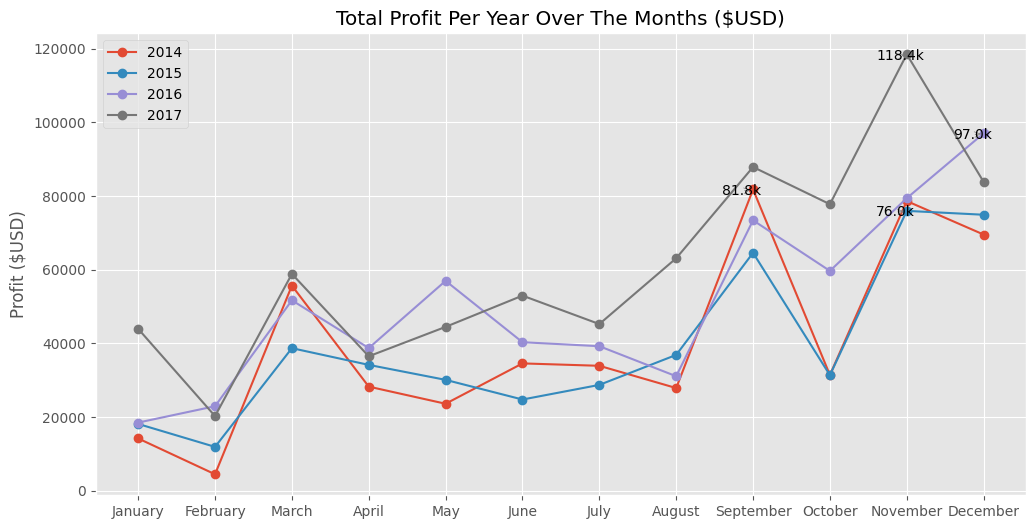

In [9]:
plt.style.use('ggplot')

plt.figure(figsize=(12 ,6))
for year in sales_by_month_yearly.index:
    plt.plot(months , sales_by_month_yearly.loc[year] , label=year , marker='o')
    max_month = sales_by_month_yearly.loc[year].idxmax()
    max_month_value = sales_by_month_yearly.loc[year].max()
    max_month_value_formatted = humanize.intword(max_month_value).replace(" thousand" ,  "k")    
    month_index = months.index(max_month)
    plt.annotate(max_month_value_formatted , xy=(month_index , max_month_value) , xytext=(month_index - 0.4 , max_month_value - 1500)  , arrowprops=dict(arrowstyle='->',color='gray'))
    
plt.ylabel("Profit ($USD)")
plt.title("Total Profit Per Year Over The Months ($USD)")
plt.legend()
plt.savefig("figures/question_3_fig.png") 
plt.show()